## Kmeans Clustring Algorithm

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
class Kmeans:

    # input: number od clusters and length of array
    def __init__(self, clusters, n):

        self.x = {i: [] for i in range(clusters)}

        self.centroid = np.random.randint(low=0, high=n, size=(clusters, 2))

        self.clusters = clusters

    # predict implementaion function
    def predict(self, x):

        d_index = []

        for i in range(len(x)):

            output = map(lambda y: np.linalg.norm(y - x[i]), self.centroid)

            distance = list(output)

            d_index.append(distance.index(min(distance)))

        return d_index

    # Fit implementaion function
    def fit(self, x):

        new = True

        n = len(x)

        while True:

            for i in range(n):

                output = map(lambda y: np.linalg.norm(y - x[i]), self.centroid)

                distance = list(output)

                self.x[distance.index(min(distance))].append(x[i])

            if new:

                old_centroid = self.centroid

                for i in range(len(self.centroid)):

                    self.centroid[i] = np.average(self.x[i], axis=0)

                new = False

                self.x = {i: [] for i in range(self.clusters)}

                continue

            # absolute difference
            a_diff = np.absolute(old_centroid - self.centroid)

            # distance average
            d_average = np.average(a_diff, axis=0)

            if d_average[0] < 1e-7 and d_average[1] < 1e-7:

                break

            else:

                old_centroid = self.centroid

                for i in range(len(self.centroid)):

                    self.centroid[i] = np.average(self.x[i], axis=0)

                self.x = {i: [] for i in range(self.clusters)}

                continue

    # Transform implementaion function
    def transform(self, x):

        distance = []

        for i in range(len(x)):

            output = map(lambda y: np.linalg.norm(y - x[i]), self.centroid)

            dis = list(output)

            distance.append(dis)

        return distance


    # Fit and predict 
    def fit_predict(self, x):

        self.fit(x)

        return self.predict(x)

    # Fit and transform
    def fit_transform(self, x):

        self.fit(x)

        return self.transform(x)

if __name__ == '__main__':

    #giving hard-coded array
    a = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

    kmeans = Kmeans(clusters=2, n=len(a))

In [125]:
print(kmeans.x)

{0: [array([1, 2]), array([1, 4]), array([1, 0])], 1: [array([10,  2]), array([10,  4]), array([10,  0])]}


In [97]:
print(kmeans.fit(a))

None


In [102]:
print(kmeans.fit_transform(a))

[[0.0, 8.0], [2.0, 8.246211251235321], [2.0, 8.246211251235321], [9.0, 1.0], [9.219544457292887, 2.23606797749979], [9.219544457292887, 2.23606797749979]]


In [103]:
predictions = kmeans.predict(a)

In [104]:
print(predictions)

[0, 0, 0, 1, 1, 1]


In [107]:
table = pd.DataFrame(a)
table["tag"] = predictions
table.rename(columns={0: "x", 1: "y"}, inplace=True)

In [109]:
print(table)

    x  y  tag
0   1  2    0
1   1  4    0
2   1  0    0
3  10  2    1
4  10  4    1
5  10  0    1


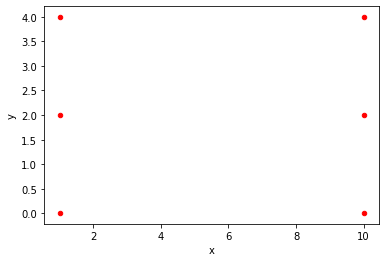

In [116]:
table.plot(kind='scatter',x='x',y='y',color='red')
plt.show()

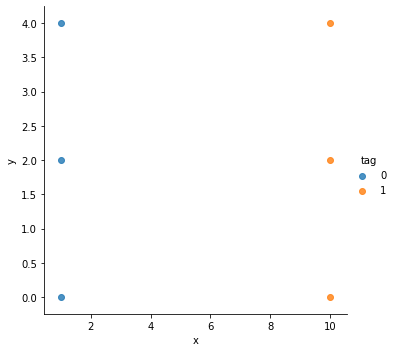

In [120]:
plot = sns.lmplot(data=table, x='x', y='y', hue='tag', 
                   fit_reg=False, legend=True, legend_out=True)